In [2]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import os
import cv2

from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import Adam

from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping


from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
x_train= '/content/drive/MyDrive/data/train'
x_test= '/content/drive/MyDrive/data/test'

In [6]:
x_train = ImageDataGenerator(rescale=1/255)
x_test = ImageDataGenerator(rescale=1/255)

In [7]:
x_train_data = x_train.flow_from_directory(
    directory=r"/content/drive/MyDrive/data/train",
    target_size=(255, 255),
    batch_size=3,
    class_mode= "categorical",)
x_test_data = x_test.flow_from_directory(
    directory=r"/content/drive/MyDrive/data/test",
    target_size=(255, 255),
    batch_size=3,
    class_mode= "categorical",)

Found 1017 images belonging to 15 classes.
Found 238 images belonging to 15 classes.


In [8]:
x_train_data.class_indices

{'cá ali vàng': 0,
 'cá betta': 1,
 'cá chim sâu': 2,
 'cá dĩa 1': 3,
 'cá hề': 4,
 'cá hoàng gia': 5,
 'cá hổ': 6,
 'cá koi': 7,
 'cá la hán': 8,
 'cá lau kiếng': 9,
 'cá mã giáp': 10,
 'cá ngựa 1': 11,
 'cá rồng': 12,
 'cá tai tượng': 13,
 'cá trạng nguyên': 14}

In [9]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size = (3,3),padding = 'Same',activation ='relu',input_shape = (255,255,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))



model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(15, activation = "softmax"))

In [ ]:

from tensorflow.keras.optimizers import SGD, Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train_data,epochs=50,batch_size=32,verbose=1,validation_data= x_test_data)

Epoch 1/50
339/339 [==============================] - 588s 2s/step - loss: 2.5850 - accuracy: 0.1131 - val_loss: 2.6731 - val_accuracy: 0.0420
Epoch 2/50
339/339 [==============================] - 138s 406ms/step - loss: 2.5314 - accuracy: 0.1160 - val_loss: 2.5739 - val_accuracy: 0.1176
Epoch 3/50
339/339 [==============================] - 135s 399ms/step - loss: 2.2587 - accuracy: 0.2212 - val_loss: 2.8526 - val_accuracy: 0.2353
Epoch 4/50
339/339 [==============================] - 137s 405ms/step - loss: 1.9210 - accuracy: 0.3835 - val_loss: 1.7049 - val_accuracy: 0.4706
Epoch 5/50
339/339 [==============================] - 135s 399ms/step - loss: 1.4580 - accuracy: 0.5634 - val_loss: 1.2848 - val_accuracy: 0.6134
Epoch 6/50
339/339 [==============================] - 138s 406ms/step - loss: 1.0617 - accuracy: 0.6785 - val_loss: 0.9061 - val_accuracy: 0.7059
Epoch 7/50
339/339 [==============================] - 136s 400ms/step - loss: 0.8308 - accuracy: 0.7414 - val_loss: 0.8638 - va

In [12]:
model.save('nhandiencacanh.h5')

In [13]:
from keras.models import load_model
recognition = load_model('nhandiencacanh.h5')

In [14]:
score = model.evaluate(x_test_data,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  3.194282054901123
Độ chính xác kiểm tra là:  0.8823529481887817


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper-left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


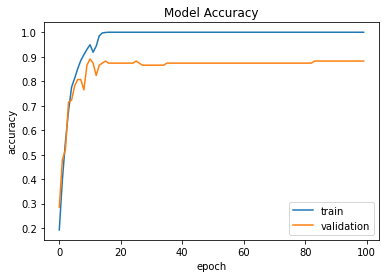

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper-left')

In [ ]:
labels = {0:'cá ali vàng',
          1: 'cá betta',
          2: 'cá chim sâu',
          3: 'cá dĩa 1',
          4: 'cá hề',
          5: 'cá hoàng gia',
          6: 'cá hổ',
          7: 'cá koi',
          8: 'cá la hán',
          9: 'cá lau kiếng',
          10:'cá mã giáp',
          11:'cá ngựa 1',
          12:'cá rồng',
          13:'cá tai tượng',
          14:'cá trạng nguyên'}
import numpy as np
from numpy import argmax
from keras.saving.save import load_model
model5=load_model('nhandiencacanh.h5')
from keras.preprocessing.image import load_img, img_to_array


(1, 150, 150, 3)

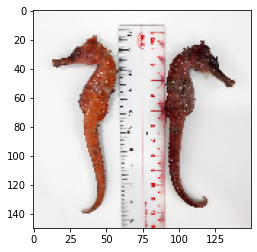

In [17]:

img=load_img('/content/drive/MyDrive/data/test/cá ngựa 1/cá ngựa (1).jpg', target_size=(150,150)) #filename: link hinh anh
plt.imshow(img)
img=img_to_array(img)
img = img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
img.shape


In [18]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Saving maxresdefault-2-1576053133554796924286-crop-15760531380571746360749-1576294643427511732891-crop-1576294742017619598779.webp to maxresdefault-2-1576053133554796924286-crop-15760531380571746360749-1576294643427511732891-crop-1576294742017619598779.webp
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Giá trị dự đoán:  cá koi


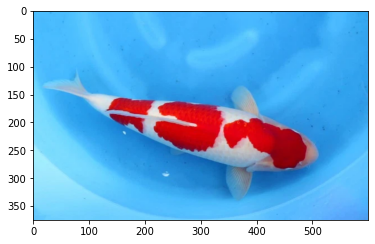

In [19]:
uploaded=files.upload()
for fn in uploaded.keys():
  #predicting images
  path='/content/' + fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))
  img=image.load_img(path,target_size=(255,255))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', labels[np.argmax(y_predict)])

Saving cach-cham-soc-ca-ho.jpg to cach-cham-soc-ca-ho.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Giá trị dự đoán:  cá hổ


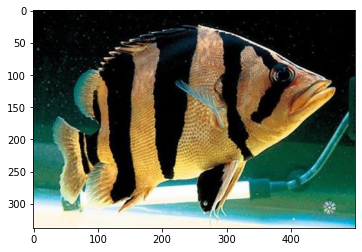

In [22]:
uploaded=files.upload()
for fn in uploaded.keys():
  #predicting images
  path='/content/' + fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))
  img=image.load_img(path,target_size=(255,255))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', labels[np.argmax(y_predict)])

Saving ca-ngua.jpg to ca-ngua.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Giá trị dự đoán:  cá ngựa 1


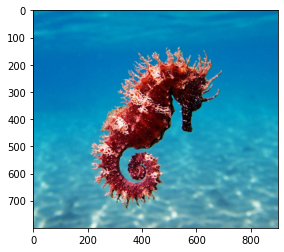

In [23]:
uploaded=files.upload()
for fn in uploaded.keys():
  #predicting images
  path='/content/' + fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))
  img=image.load_img(path,target_size=(255,255))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', labels[np.argmax(y_predict)])

Saving ca-trang-nguyen-gia-bao-nhieu.jpg to ca-trang-nguyen-gia-bao-nhieu.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Giá trị dự đoán:  cá trạng nguyên


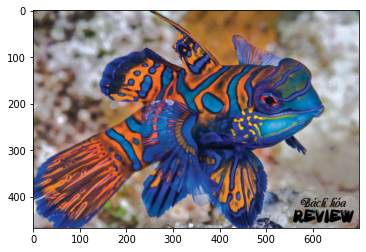

In [24]:
uploaded=files.upload()
for fn in uploaded.keys():
  #predicting images
  path='/content/' + fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))
  img=image.load_img(path,target_size=(255,255))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', labels[np.argmax(y_predict)])

Saving su-that-thu-vi-ve-nhung-chu-ca-he.jpg to su-that-thu-vi-ve-nhung-chu-ca-he.jpg
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Giá trị dự đoán:  cá hề


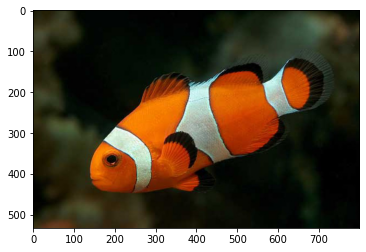

In [26]:
uploaded=files.upload()
for fn in uploaded.keys():
  #predicting images
  path='/content/' + fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))
  img=image.load_img(path,target_size=(255,255))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', labels[np.argmax(y_predict)])

Saving Ca-trang-nguyen-2-mau.jpg to Ca-trang-nguyen-2-mau.jpg
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Giá trị dự đoán:  cá hoàng gia


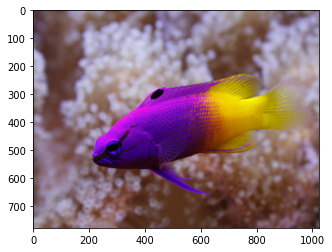

In [29]:
uploaded=files.upload()
for fn in uploaded.keys():
  #predicting images
  path='/content/' + fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))
  img=image.load_img(path,target_size=(255,255))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', labels[np.argmax(y_predict)])

Saving cá-la-hán-1.jpg to cá-la-hán-1.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Giá trị dự đoán:  cá la hán


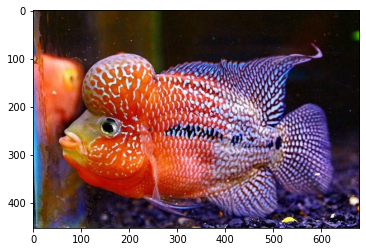

In [31]:
uploaded=files.upload()
for fn in uploaded.keys():
  #predicting images
  path='/content/' + fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))
  img=image.load_img(path,target_size=(255,255))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', labels[np.argmax(y_predict)])

Saving images.jpg to images.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Giá trị dự đoán:  cá lau kiếng


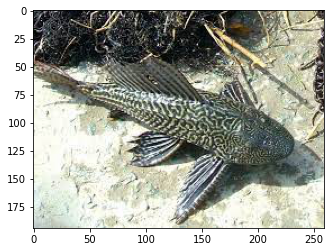

In [32]:
uploaded=files.upload()
for fn in uploaded.keys():
  #predicting images
  path='/content/' + fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))
  img=image.load_img(path,target_size=(255,255))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', labels[np.argmax(y_predict)])

Saving ca-chim-sau_2.jpg to ca-chim-sau_2.jpg
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Giá trị dự đoán:  cá chim sâu


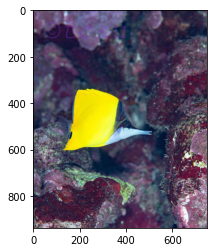

In [36]:
uploaded=files.upload()
for fn in uploaded.keys():
  #predicting images
  path='/content/' + fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))
  img=image.load_img(path,target_size=(255,255))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', labels[np.argmax(y_predict)])

Saving maxresdefault-3-1024x576.jpg to maxresdefault-3-1024x576.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Giá trị dự đoán:  cá hổ


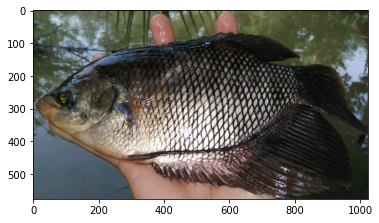

In [37]:
uploaded=files.upload()
for fn in uploaded.keys():
  #predicting images
  path='/content/' + fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))
  img=image.load_img(path,target_size=(255,255))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', labels[np.argmax(y_predict)])

Saving ky-thuat-nuoi-ca-la-han-hieu-qua.jpg to ky-thuat-nuoi-ca-la-han-hieu-qua (1).jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Giá trị dự đoán:  cá mã giáp


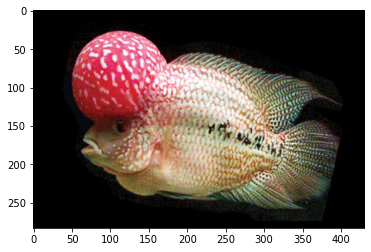

In [38]:
uploaded=files.upload()
for fn in uploaded.keys():
  #predicting images
  path='/content/' + fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))
  img=image.load_img(path,target_size=(255,255))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', labels[np.argmax(y_predict)])

In [39]:
 from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('cuoikyAI.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2022-06-23 01:36:24--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-06-23 01:36:24 (29.9 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/cuoikyAI.ipynb to pdf
[NbConvertApp] Support files will be in cuoikyAI_files/
[NbConvertApp] Making directory ./cuoikyAI_files
[NbConvertApp] Making directory ./cuoikyAI_files
[

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'